<a href="https://colab.research.google.com/github/Devscoding/MAT421/blob/main/ModuleF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **20.1 Numerical Differentiation**
We define a **numerical grid** to be an evenly spaced set of points over the domain of a given function. Where the **step size** of said numerical grid is the distance between adjacent points on the grid.

In python a function $f(x)$ can be represented over a interval if we represent the computation of its value on a numerical grid

Below is an example of a Numerical Grid for the function $f(x,y) = x^2 + y^2$

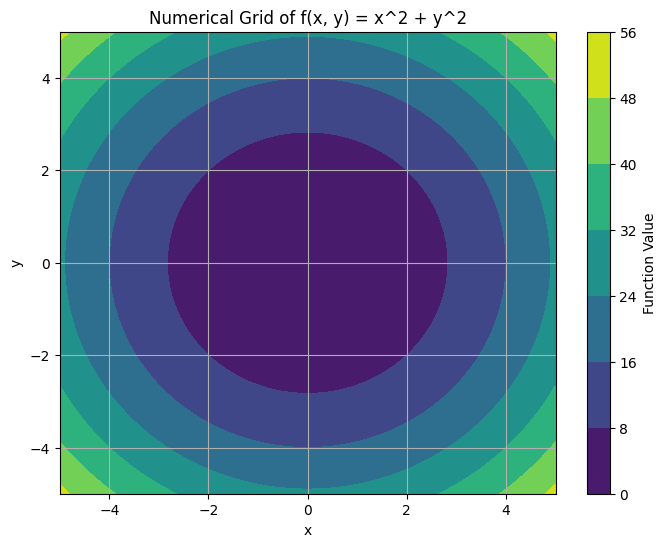

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x**2 + y**2

# Grid Creation
x = np.linspace(-5, 5, 100)  # 100 points from -5 to 5
y = np.linspace(-5, 5, 100)  # 100 points from -5 to 5
X, Y = np.meshgrid(x, y)

# Evaluating function on grid
Z = f(X, Y)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Function Value')
plt.title('Numerical Grid of f(x, y) = x^2 + y^2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


# **20.2 Finite Difference Approximating Derivatives**
As we know the derivative $f'(x)$ of a fucntion at the point $x=a$ is defined by the formula $f'(a)=\displaystyle{\lim_{h \to 0}}$ $ \frac{f(a+h)-f(a)}{h}$ and the slope at $x=a$ is the derivative. For **finite difference** approximations of this slope we can use values close to the point $x=a$ to achieve our desired value.

There are various forms of finite difference formulas:

**Foward difference**:
$f'(x_j) = \frac{f(x_{j+1})-f(x_{j})}{x_{j+1}-x_j}$

Estimates the slope of a function at $x_j$ using the line that connects $(x_j, f(x_j))$ and $(x_{j+1}, f(x_{j+1}))$

**Backward difference**:
$f'(x_j) = \frac{f(x_{j})-f(x_{j-1})}{x_{j}-x_{j-1}}$

Estimates the slope of a function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_j, f(x_j))$

**Central difference**:
$f'(x_j) = \frac{f(x_{j+1})-f(x_{j-1})}{x_{j+1}-x_{j-1}}$

Estimates the slope of a function at $x_j$ using the line that connects $(x_{j-1}, f(x_{j-1}))$ and $(x_{j+1}, f(x_{j+1}))$

Below is an example of each of these formulas being used to approximate the derivative of $sin(x)$


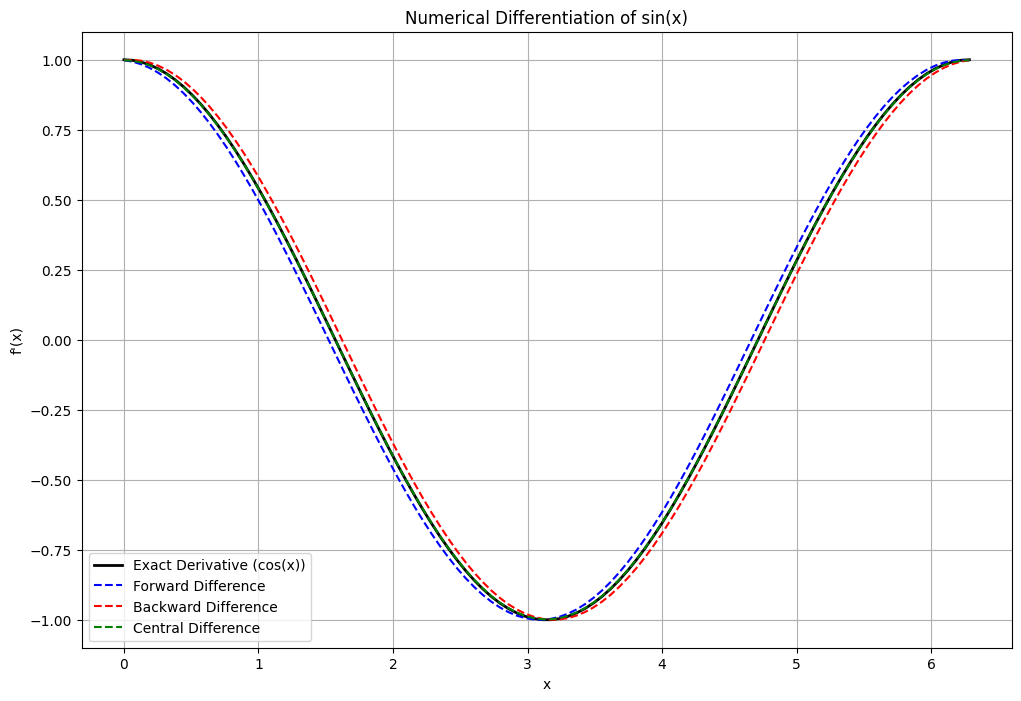

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function sin(x) and exact derivative
def f(x):
    return np.sin(x)

def f_prime(x):
    return np.cos(x)

x = np.linspace(0, 2 * np.pi, 100)  # From 0 to 2π
h = 0.1  # Step size for numerical differentiation

# Forward difference
forward_diff = (f(x + h) - f(x)) / h

# Backward difference
backward_diff = (f(x) - f(x - h)) / h

# Central difference
central_diff = (f(x + h) - f(x - h)) / (2 * h)

# Exact derivative
exact_derivative = f_prime(x)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(x, exact_derivative, 'k', label='Exact Derivative (cos(x))', linewidth=2)
plt.plot(x, forward_diff, 'b--', label='Forward Difference')
plt.plot(x, backward_diff, 'r--', label='Backward Difference')
plt.plot(x, central_diff, 'g--', label='Central Difference')
plt.title('Numerical Differentiation of sin(x)')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()
plt.grid(True)
plt.show()

# **20.3 Approximating of Higher Order Derivatives and 20.4 Numerical Differentiation with Noise**

In section 20.2 when discussing the different type of finite difference formulas, each one of those could also be expressed through a corresponding Taylor Series as well.

In fact when dealing with higher order deruvatives it becomes simpler to use a Taylor Series for an approximation.

Below is an example of this for the function $cos(x)$

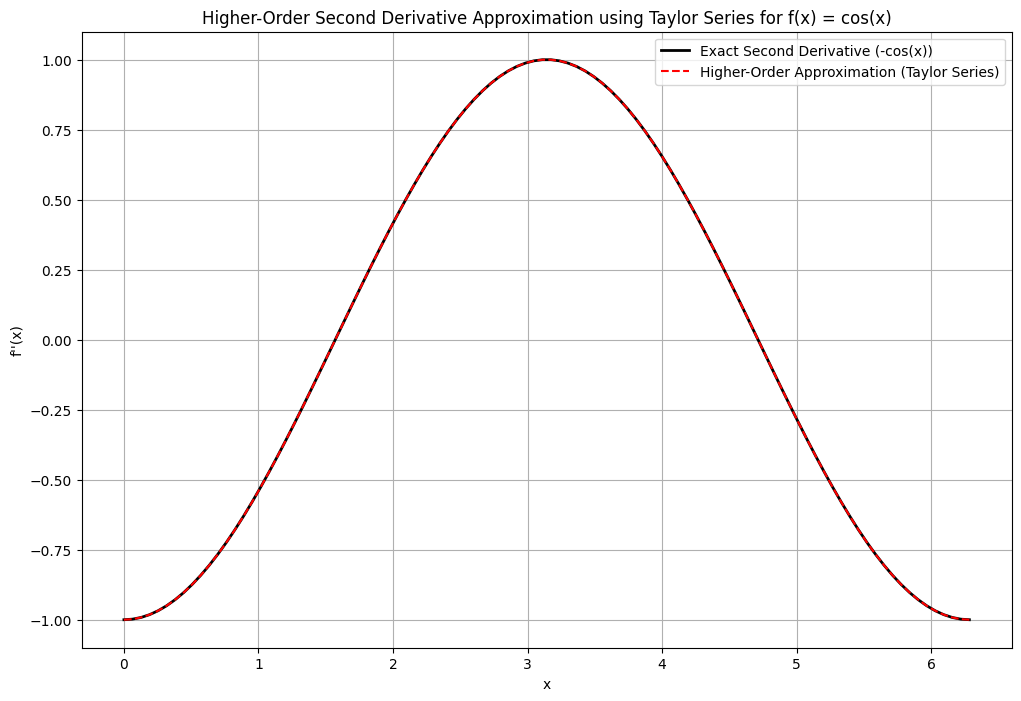

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function cos(x) and exact second derivative
def f(x):
    return np.cos(x)

def f_double_prime(x):
    return -np.cos(x)

# Domain
x = np.linspace(0, 2 * np.pi, 100)
# Step size
h = 0.1

# Taylor series  approximation
higher_order_diff = (
    16 * f(x + h) + 16 * f(x - h) - f(x + 2 * h) - f(x - 2 * h) - 30 * f(x)
) / (12 * h**2)

# Exact second derivative
exact_second_derivative = f_double_prime(x)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(x, exact_second_derivative, 'k', label='Exact Second Derivative (-cos(x))', linewidth=2)
plt.plot(x, higher_order_diff, 'r--', label='Higher-Order Approximation (Taylor Series)')
plt.title('Higher-Order Second Derivative Approximation using Taylor Series for f(x) = cos(x)')
plt.xlabel('x')
plt.ylabel('f\'\'(x)')
plt.legend()
plt.grid(True)
plt.show()

Unfortunately data can be contaminated with sorts of **noise** which means the true value of a function varies by some amount then what we would typically expect to find if we were to simply calculate the value from a more pure mathematical function, so its important to remember this when performing such calculations and recording data.